<center><h1>Altanoveo TP</h1></center>

## Importation des librairies

In [25]:
import numpy as np
import pandas as pd
import json
from glob import glob
import spacy
from collections import Counter
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud, STOPWORDS
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow import keras

## Importation du vocabulaire

In [14]:
nlp = spacy.load("en_core_web_sm")
vocab = list(nlp.vocab.strings)
stop_words = list(nlp.Defaults.stop_words) + ["rt", "click"]

## Fonction de vérification du vocabulaire

In [71]:
def keep_in_voc(sentence):
    en_sentence = [token for token in sentence.split(' ') if token in vocab and token not in ["rt", "click"]]
    lemma_tokens = [token.lemma_ for token in nlp(" ".join(en_sentence))]
    return ' '.join(lemma_tokens)

## Importation des données

## Fonction de suppression des émoticons

In [72]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [73]:
texts = pd.DataFrame()
fire_tweets = glob('*/*output_tweet.json')
without_fire_tweets = glob('without_fire/*output*.json')

for tweet in fire_tweets:
    with open(tweet, 'r') as file:
        try:
            content = json.loads(file.read())['data']
            for elt in content:
                if elt['lang'] == 'en':
                    cleaned_text = remove_emoji(elt['text'].replace('#', '').replace('\n', ' '))
                    cleaned_text = keep_in_voc(cleaned_text)
                    texts = texts.append({'is_fire': True, 'text': cleaned_text.lower()}, ignore_index=True)
        except:
            print("Erreur : pas de données dans le fichier")

for tweet in without_fire_tweets:
    with open(tweet, 'r') as file:
        try:
            content = json.loads(file.read())['data']
            for elt in content:
                if elt['lang'] == 'en':
                    cleaned_text = remove_emoji(elt['text'].replace('#', '').replace('\n', ' '))
                    cleaned_text = keep_in_voc(cleaned_text)
                    texts = texts.append({'is_fire': False, 'text': cleaned_text}, ignore_index=True)
        except:
            print("Erreur : pas de données dans le fichier")

texts.head()

/tmp/ipykernel_374/2909911024.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts = texts.append({'is_fire': True, 'text': cleaned_text.lower()}, ignore_index=True)
/tmp/ipykernel_374/2909911024.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts = texts.append({'is_fire': True, 'text': cleaned_text.lower()}, ignore_index=True)
/tmp/ipykernel_374/2909911024.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts = texts.append({'is_fire': True, 'text': cleaned_text.lower()}, ignore_index=True)
/tmp/ipykernel_374/2909911024.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts = texts.append({'is_fire': True, 'text'

Erreur : pas de données dans le fichier


/tmp/ipykernel_374/2909911024.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts = texts.append({'is_fire': True, 'text': cleaned_text.lower()}, ignore_index=True)
/tmp/ipykernel_374/2909911024.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts = texts.append({'is_fire': True, 'text': cleaned_text.lower()}, ignore_index=True)
/tmp/ipykernel_374/2909911024.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts = texts.append({'is_fire': True, 'text': cleaned_text.lower()}, ignore_index=True)
/tmp/ipykernel_374/2909911024.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts = texts.append({'is_fire': True, 'text'

## Tf-idf

In [6]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(texts['text'])
feature_names = vectorizer.get_feature_names_out()
denselist = vectors.todense().tolist()
tf_idf = pd.DataFrame(denselist, columns=feature_names)
tf_idf

,00,000,01,014,02,03,04,060,07,08,...,zane,zealand,zero,zeus,zimbabwe,zodiac,zoe,zone,zones,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data = pd.concat([texts, tf_idf], axis=1)
data.head()

,is_fire,text,00,000,01,014,02,03,04,060,...,zane,zealand,zero,zeus,zimbabwe,zodiac,zoe,zone,zones,zoo
0,True,like the fires that are destroying greece and,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,True,greece brings under control as more blazes thr...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,True,trying to find a fire here that will help us u...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,True,greece brings under control as more blazes thr...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,True,greece brings under control as more blazes thr...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train test split

In [8]:
X_train, X, y_train, y = train_test_split(np.asarray(vectors.todense()), data['is_fire'], test_size=0.30)
X_test, X_val, y_test, y_val = train_test_split(X, y, test_size=0.50)

## Pénalisation de la prédiction des classes

In [9]:
p0 = len(data) / (2 * Counter(data['is_fire'])[False])
p1 = len(data) / (2 * Counter(data['is_fire'])[True])
class_weights = {0: p0, 1: p1}
print(Counter(data['is_fire']))
print('Poids :', class_weights)

Counter({True: 3568, False: 3567})
Poids : {0: 1.0001401738155313, 1: 0.999859865470852}


## Modélisation

In [20]:
clf = DecisionTreeClassifier(class_weight=class_weights)
clf = clf.fit(X_train, y_train)
justesse = clf.score(X_test, y_test)
justesse

0.9448598130841122

## Matrice de confusion et métriques

In [24]:
tn, fp, fn, tp = confusion_matrix(y_test, clf.predict(X_test)).ravel()
pd.DataFrame.from_dict({'justesse': [justesse], 'précision': [tp/(tp+fp)], 'rappel': [tp/(tp+fn)], 'f1-score': [2*tp/(tp+fp)*tp/(tp+fn)/(tp/(tp+fp)+tp/(tp+fn))]})

,justesse,précision,rappel,f1-score
0,0.94486,0.945076,0.943289,0.944182


## Schéma de l'arbre de déçision

In [17]:
wordcloud = WordCloud(width = 800, height = 800,
    background_color ='white',
    stopwords = set(stop_words),
    min_font_size = 10).generate(" ".join(data['text'])
)

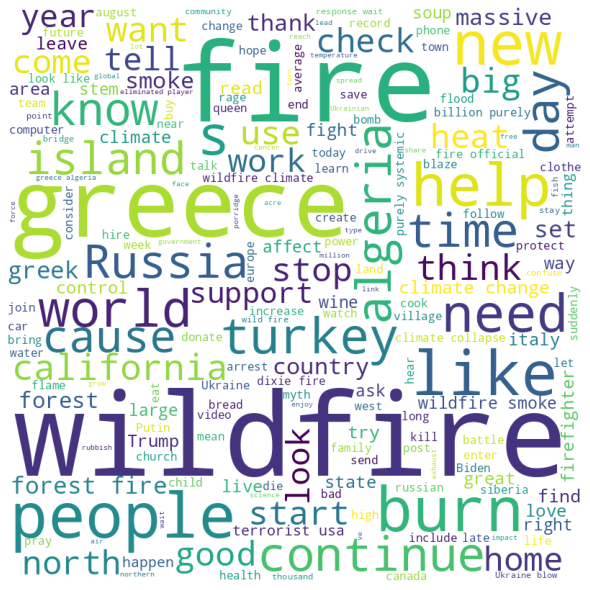

In [18]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Régression logistique

In [28]:
reg_model = LogisticRegression(class_weight=class_weights).fit(X_train, y_train)
justesse = reg_model.score(X_test, y_test)
justesse

0.9570093457943926

## Calcul des indicateurs de performance

In [29]:
tn, fp, fn, tp = confusion_matrix(y_test, reg_model.predict(X_test)).ravel()
pd.DataFrame.from_dict({'justesse': [justesse], 'précision': [tp/(tp+fp)], 'rappel': [tp/(tp+fn)], 'f1-score': [2*tp/(tp+fp)*tp/(tp+fn)/(tp/(tp+fp)+tp/(tp+fn))]})

,justesse,précision,rappel,f1-score
0,0.957009,0.980119,0.931947,0.955426


In [53]:
size = 0
coefs = reg_model.coef_[0].tolist()
w_words = pd.DataFrame()
while size < 10:
    max_value = max(coefs)
    index = coefs.index(max_value)
    w_words = pd.concat([w_words, pd.DataFrame.from_dict({'index_word': [index], 'weight': [max_value]})])
    coefs[index] = 0
    size += 1

In [69]:
words = [tf_idf.columns[row['index_word']] for index, row in w_words[['index_word']].iterrows()]


In [70]:
words

['wildfire',
 'greece',
 'fires',
 'wildfires',
 'fire',
 'in',
 'climate',
 'algeria',
 'california',
 'greek']